# Réalisé par : 

    __ ABDOULAHI SALAHANNE Ahmed
    __ CONDE Alama
    __ KPATOUKPA Kpodjro

    Vérifiez que vous avez les fichiers DataForMl.pkl et modelRBF puis allez éxecuter les 2 dernières cellules
     sinon, éxecutez juste les 7 dernières cellules

# Lecture des données en python 

I - Description des données 
La signification commerciale de chaque colonne dans les données est la suivante

    1) cylinders: multi-valued discrete
    2) displacement: continuous
    3) horsepower: continuous
    4) weight: continuous
    5) acceleration: continuous
    6) model year: multi-valued discrete
    7) origin: multi-valued discrete
    8) car name: string (unique for each instance)

In [92]:
import numpy as np
import matplotlib.pylab as plt
# Import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
# importation des librairies nécessaires
import pandas as pd
import seaborn as sns

In [24]:
# # Supprimer les messages d'avertissemen
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Lecture du dataset
# DataFrame
dataSet = pd.read_csv("autosmpgdata.csv")

print ( 'Forme avant de supprimer les valeurs en double :' ,dataSet.shape)
# Suppression des lignes en double le cas échéant 
dataSet = dataSet.drop_duplicates () 
print ( 'Forme après suppression des valeurs en double :' ,  dataSet.shape )
print("Base d'exemples: ")
dataSet.head(15)

Forme avant de supprimer les valeurs en double : (398, 9)
Forme après suppression des valeurs en double : (398, 9)
Base d'exemples: 


,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN,NAME
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# Définition de l'énoncé du problème
Créer un modèle ML capable de prédire le consommation de carburant en miles par gallon (MPG)

    --> Variable cible : MPG
    --> Variables de prédictions : CYLINDERS, DISPLACEMENT, HP, WEIGHT, ACCELERATION, YEAR, ORIGIN, NAME


# Détermination du type de Machine Learning
Sur la base de l'énoncé du problème, nous comprenons que nous devons créer un modèle de régression ML supervisé , car la variable cible(mpg) est continue.



# Examination de la distribution de la variable cible 
 Création d'un histogramme car la variable cible est continue 
 Cela nous aidera à comprendre la distribution des valeurs

<AxesSubplot:>

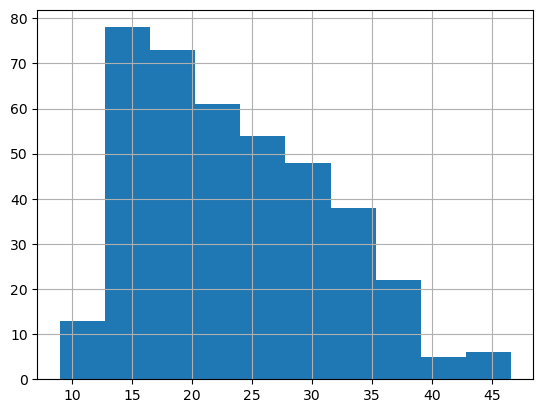

In [26]:
dataSet['MPG'].hist()

La distribution des données de la variable cible est satisfaisante pour aller plus loin. 
Il existe un nombre suffisant de lignes pour chaque type de valeurs à partir desquelles apprendre.


# Exploration basique des données 
    __Observer les informations résumées des données 
    __Types de données, valeurs manquantes basées sur le nombre de valeurs 
        non nulles par rapport au nombre total de lignes, etc. 
    __Supprimer les variables des données qui ont trop de valeurs manquantes (valeurs manquantes > 30%) 
    __Supprimer les variables qualitatives qui ne peut pas être utilisé dans Machine Learning

In [27]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   CYLINDERS     398 non-null    int64  
 2   DISPLACEMENT  398 non-null    float64
 3   HP            398 non-null    object 
 4   WEIGHT        398 non-null    int64  
 5   ACCELERATION  398 non-null    float64
 6   YEAR          398 non-null    int64  
 7   ORIGIN        398 non-null    int64  
 8   NAME          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 31.1+ KB


In [28]:
# Voyons les statistiques descriptives des données 

dataSet.describe(include='all')

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN,NAME
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [29]:
# Trouver des valeurs uniques pour chaque colonne 
# POUR comprendre quelle colonne est catégorique et laquelle est continue 
# Généralement, si le nombre de valeurs uniques est < 20, la variable est susceptible d'être une catégorie autrement continue 

dataSet.nunique()

MPG             129
CYLINDERS         5
DISPLACEMENT     82
HP               94
WEIGHT          351
ACCELERATION     95
YEAR             13
ORIGIN            3
NAME            305
dtype: int64

# Résultats de l'exploration des données de base 
    __CYLINDERS : discret, sélectionné <-peut être condéré comme catégoriel car 5 types seulement->
    __DISPLACEMENT: continu, sélectionné
    __HP : Objet " contient probablement des Nan"
    __WEIGHT : discret, sélectionné 
    __ACCELERATION : continu, sélectionné 
    __YEAR : discret, sélectionné <-peut être condéré comme catégoriel car 13 types seulement->
    __ORIGIN : discret, sélectionné <-peut être condéré comme catégoriel car 3 types seulement->
    __NAME : object, non sélectionné  car 305 différents noms sur les 398 lignes: cette colonne n'est pas discriminante
    __ MPG: continu, sélectionné : c'est la variable cible


# Suppression des colonnes inutiles des données


In [30]:
dataSet['ORIGIN'].value_counts()

1    249
3     79
2     70
Name: ORIGIN, dtype: int64

In [31]:
# la colonne name contient 305 valeurs catégogielles différentes, elle ne sera donc pas discriminante
dataSet = dataSet.drop(['NAME'], axis=1)


# Analyse de données exploratoire visuelle 
    Variables catégorielles : diagramme à barres
    Variables continues : Histogramme



In [32]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

array([[<AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'DISPLACEMENT'}>],
       [<AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'ACCELERATION'}>],
       [<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'ORIGIN'}>]], dtype=object)

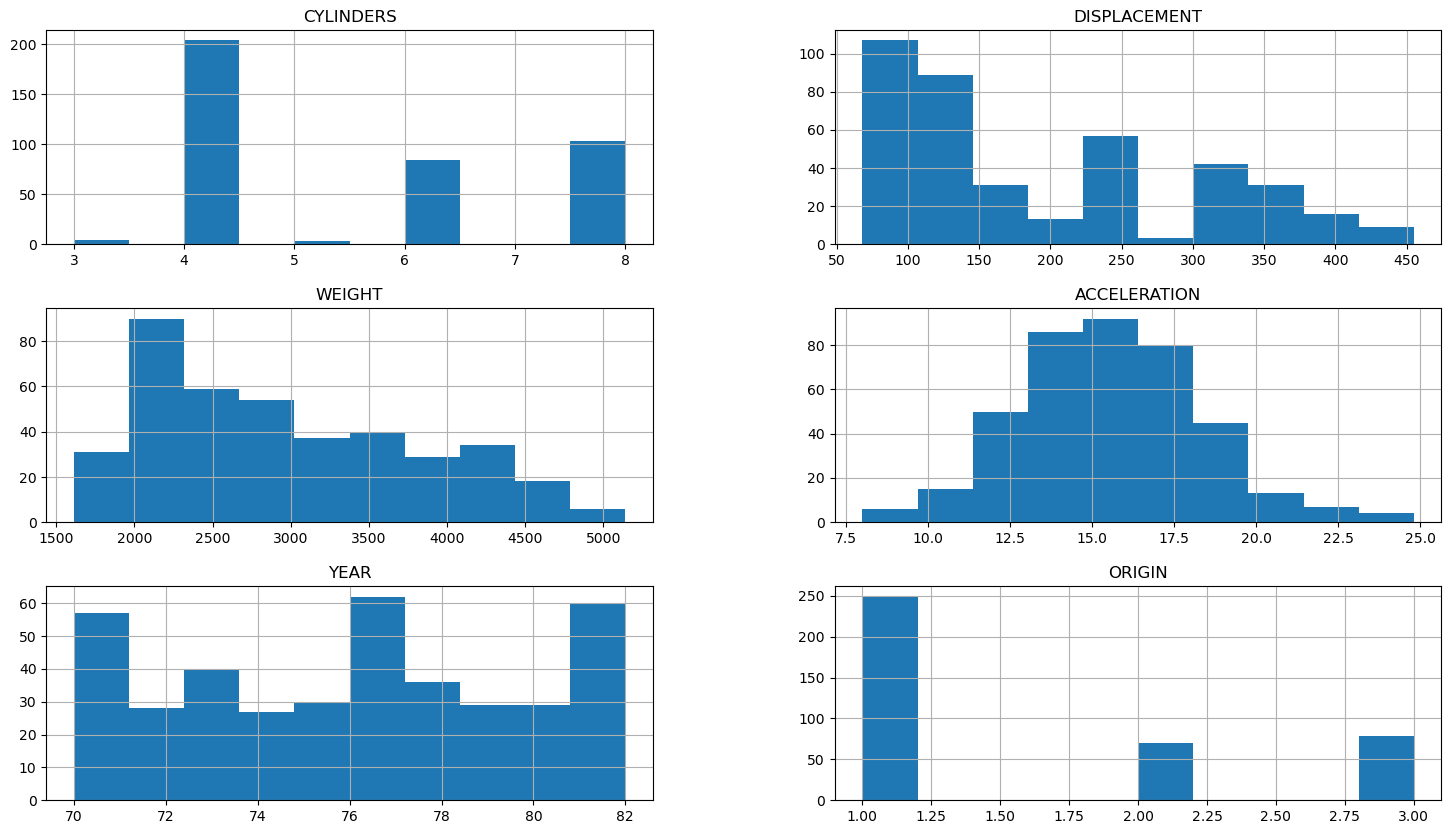

In [33]:
#  Tracer des histogrammes de plusieurs colonnes ensemble
dataSet.hist(['CYLINDERS','DISPLACEMENT','HP','WEIGHT','ACCELERATION','YEAR','ORIGIN'], figsize=(18,10))

# Interprétation de l'histogramme

Les histogrammes nous montrent la distribution des données pour une seule variable continue.

L'axe X montre la plage de valeurs et l'axe Y représente le nombre de valeurs dans cette plage. Par exemple, dans l'histogramme ci-dessus de "DISPLACEMENT", il y a environ 42 lignes de données dont la valeur est comprise entre 300 et 340.

Le résultat idéal pour l'histogramme est une courbe en cloche ou une courbe en cloche légèrement asymétrique. S'il y a trop d'asymétrie, un traitement des valeurs aberrantes doit être effectué et la colonne doit être réexaminée. Si cela ne résout pas non plus le problème, rejetez uniquement la colonne.

__Variables sélectionnées :

.. CYLINDERS, DISPLACEMENT, HP	,WEIGHT,ACCELERATION	,YEAR, ORIGIN

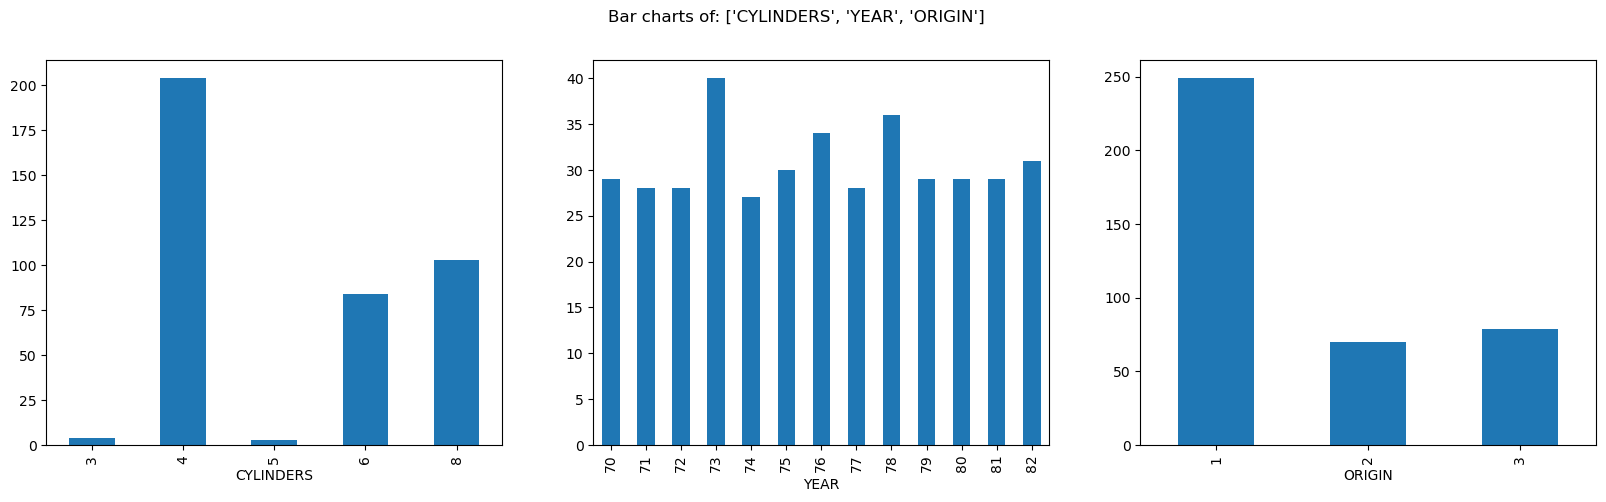

In [34]:
#####################################################################
# Si on considerait les colonnes 'CYLINDERS','YEAR','ORIGIN' comme catéories
PlotBarCharts(inpData=dataSet, colsToPlot=['CYLINDERS','YEAR','ORIGIN'])

# Traitement des valeurs aberrantes 
    __Option 1 : supprimez les enregistrements aberrants. Seulement s'il n'y a que quelques lignes perdues.
    __Option 2 : Imputer les valeurs aberrantes avec une valeur métier logique

In [52]:
# suppression des Nan puis conversion en numérique
dataSet= dataSet.dropna(axis=0, how='any')
dataSet['HP'] = dataSet['HP'].apply(pd.to_numeric, errors='coerce') 

In [53]:
# Revoyons les statistiques descriptives des données 

dataSet.describe(include='all')

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [37]:
# Recherche du nombre de valeurs manquantes pour chaque colonne 
dataSet.isnull().sum()

MPG             0
CYLINDERS       0
DISPLACEMENT    0
HP              6
WEIGHT          0
ACCELERATION    0
YEAR            0
ORIGIN          0
dtype: int64

# Feature selection 

    __Exploration visuelle de la relation entre les variables 
        Continu Vs continu ---- Scatter Plot
        Catégoriel Vs Continu---- Box Plot
         
    __Mesure statistique de la force de la relation entre les variables 
        Continu Vs Continu ---- Correlation matrix
        Catégorique Vs Continu---- Test ANOVA
        
        
# 1 Exploration des relations : 

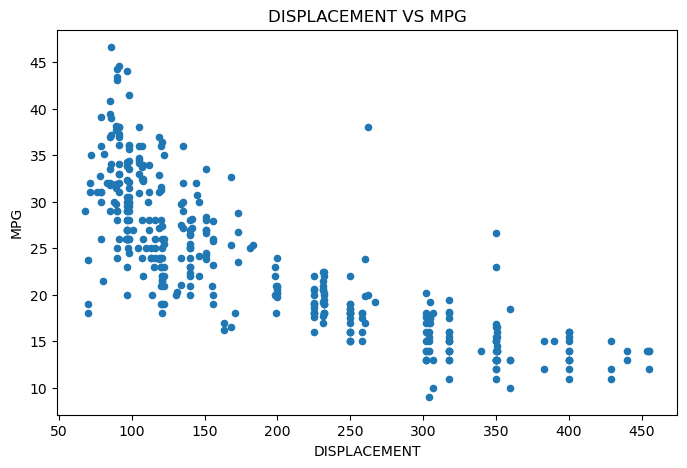

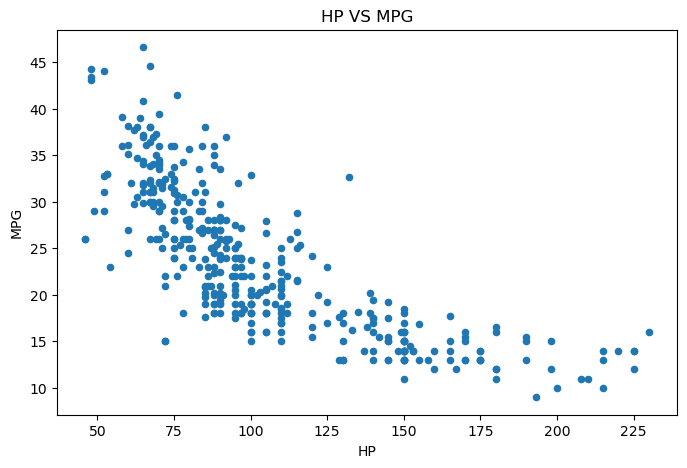

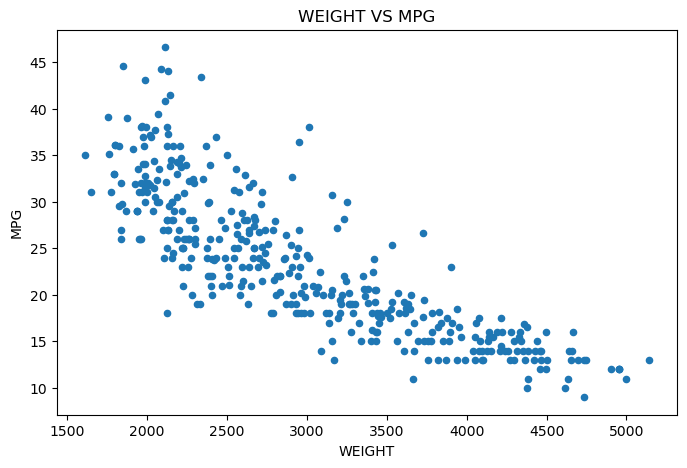

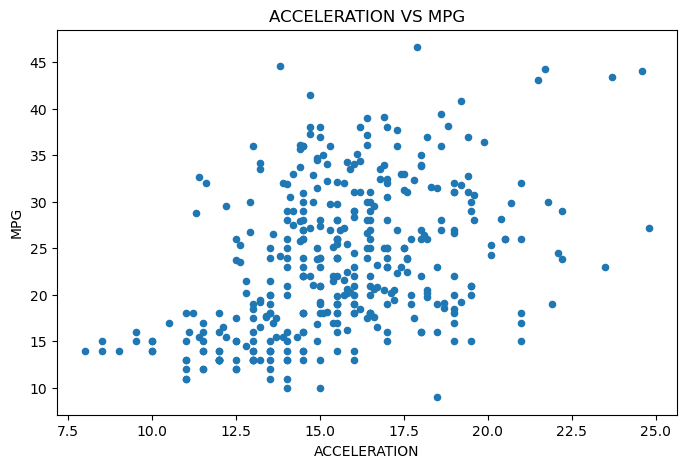

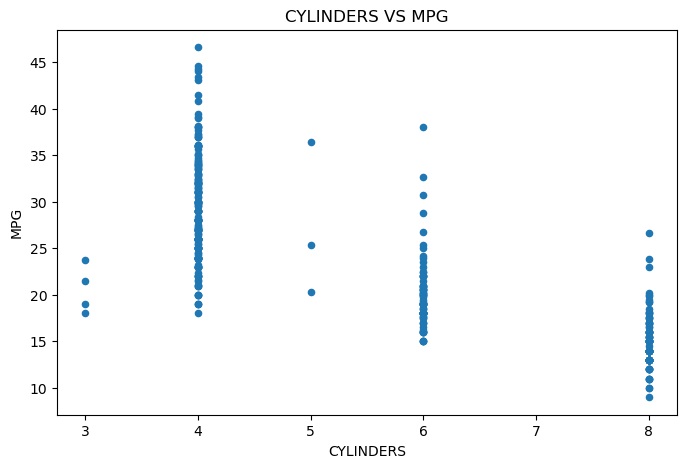

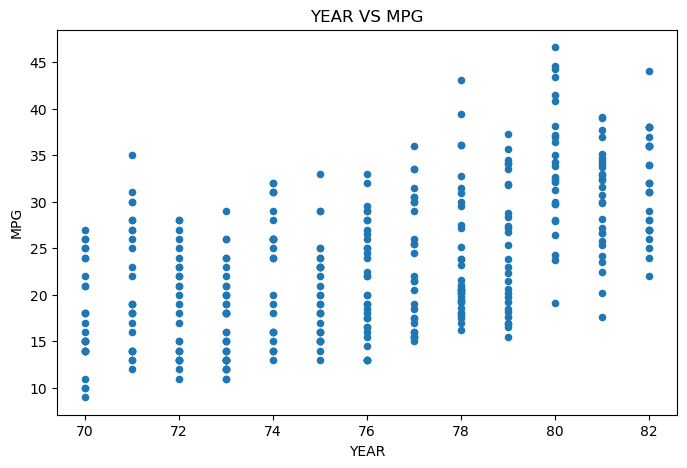

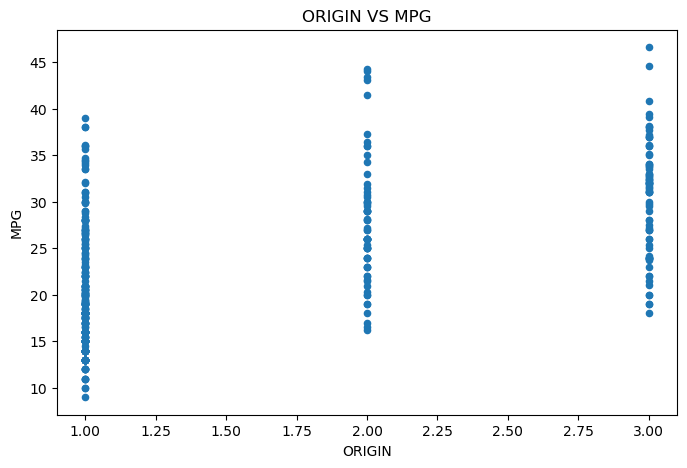

In [54]:
# Continu Vs Continu
varcontinu= ['DISPLACEMENT','HP','WEIGHT','ACCELERATION','CYLINDERS','YEAR','ORIGIN']

# Tracer un graphique en nuage de points pour chaque prédicteur par rapport à la variable cible

for var in varcontinu:
    dataSet.plot.scatter(x=var, y='MPG', figsize=(8,5), title=var+" VS "+ 'MPG')

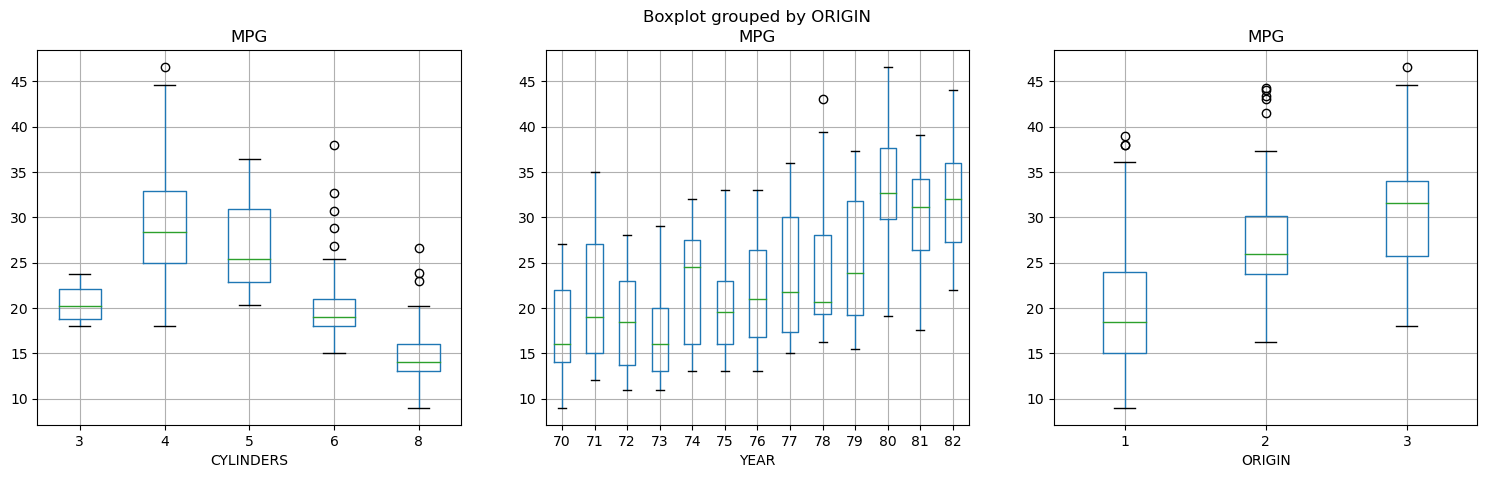

In [55]:
# Continu Vs categorie
varcategorie = ['CYLINDERS','YEAR','ORIGIN']
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(varcategorie), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for var , i in zip(varcategorie, range(len(varcategorie))):
    dataSet.boxplot(column='MPG', by=var, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# 2 Sélection de caractéristiques statistiques: a_ continu vs continu à l'aide de la valeur de corrélation
__Coeficient de corrélation de Pearson

    Cette valeur ne peut être calculée qu'entre deux colonnes numériques
    ..La corrélation entre [-1,0[ signifie inversement proportionnel, le nuage de points montrera une tendance à la baisse
    .. La corrélation entre ]0,1] signifie directement proportionnel, le nuage de points montrera une tendance à la hausse
    ..Une corrélation proche de {0} signifie Aucune relation, le nuage de points ne montrera aucune tendance claire.
     Si la valeur de corrélation entre deux variables est > 0,5 en magnitude, cela indique une bonne relation,
     le signe n'a pas d'importance
    Nous observons les corrélations entre la variable cible et toutes les autres variables prédictives 
    pour vérifier quelles colonnes/caractéristiques/prédicteurs sont réellement liés à la variable cible en question

In [56]:
# Calcul de la matrice de corrélation 
var2continu= ['MPG','DISPLACEMENT','HP','WEIGHT','ACCELERATION','CYLINDERS','YEAR','ORIGIN']
corrvarcont = dataSet[var2continu].corr()
corrvarcont

,MPG,DISPLACEMENT,HP,WEIGHT,ACCELERATION,CYLINDERS,YEAR,ORIGIN
MPG,1.000000,-0.805127,-0.778427,-0.832244,0.423329,-0.777618,0.580541,0.565209
DISPLACEMENT,-0.805127,1.000000,0.897257,0.932994,-0.543800,0.950823,-0.369855,-0.614535
HP,-0.778427,0.897257,1.000000,0.864538,-0.689196,0.842983,-0.416361,-0.455171
WEIGHT,-0.832244,0.932994,0.864538,1.000000,-0.416839,0.897527,-0.309120,-0.585005
ACCELERATION,0.423329,-0.543800,-0.689196,-0.416839,1.000000,-0.504683,0.290316,0.212746
CYLINDERS,-0.777618,0.950823,0.842983,0.897527,-0.504683,1.000000,-0.345647,-0.568932
YEAR,0.580541,-0.369855,-0.416361,-0.309120,0.290316,-0.345647,1.000000,0.181528
ORIGIN,0.565209,-0.614535,-0.455171,-0.585005,0.212746,-0.568932,0.181528,1.000000


<AxesSubplot:>

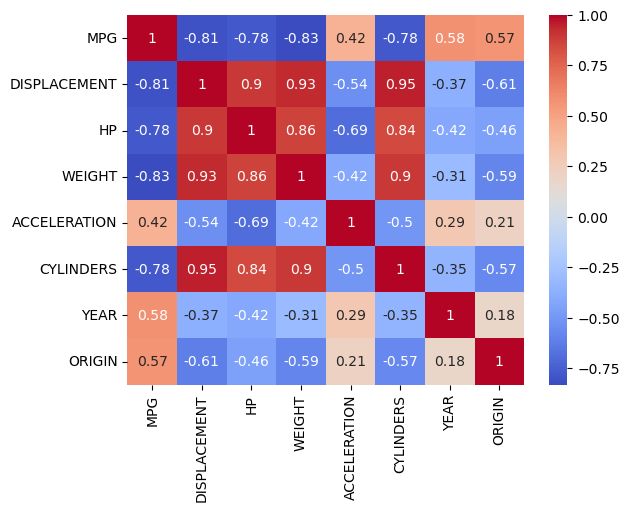

In [57]:
sns.heatmap(dataSet[var2continu].corr(),annot=True, cmap='coolwarm')

In [58]:
# Filtrer uniquement les colonnes où la corrélation absolue > 0,5 avec la variable cible 
# réduire le seuil de 0,5 si aucune variable n'est sélectionnée
corrvarcont[abs(corrvarcont['MPG'])>0.5]['MPG']

MPG             1.000000
DISPLACEMENT   -0.805127
HP             -0.778427
WEIGHT         -0.832244
CYLINDERS      -0.777618
YEAR            0.580541
ORIGIN          0.565209
Name: MPG, dtype: float64

# Colonnes continues sélectionnées finales :
CYLINDERS,	DISPLACEMENT,	HP,	WEIGHT,	YEAR,	ORIGIN	



# b _Categorielle Vs Continu à l'aide du test  d'ANOVA 

    L'analyse de la variance (ANOVA) est effectuée pour vérifier s'il existe une relation entre 
    la variable continue et catégorique donnée

    Hypothèse (H0) : Il n'y a AUCUNE relation entre les variables données (c'est-à-dire que les
    valeurs moyennes (moyennes) de la variable cible numérique sont les mêmes pour tous les 
    groupes de la variable prédictive catégorielle)
    Résultat du test ANOVA : probabilité que H0 soit vrai

In [59]:
# librairie du test ANOVA

from scipy.stats import f_oneway

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):

    # Création d'une liste vide de prédicteurs sélectionnés finaux
    SelectedPredictors=[]
    
    print('##### Résultats ANOVA ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # Si la valeur P de l'ANOVA est <0,05, cela signifie que nous rejetons H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [60]:
# Continu Vs categorie
var2categorie = ['CYLINDERS','YEAR','ORIGIN']

FunctionAnova(inpData=dataSet, 
              TargetVariable='MPG', 
              CategoricalPredictorList=var2categorie)

##### Résultats ANOVA ##### 

CYLINDERS is correlated with MPG | P-Value: 8.785541055264391e-85
YEAR is correlated with MPG | P-Value: 1.9868013280928138e-39
ORIGIN is correlated with MPG | P-Value: 8.673818448010683e-35


['CYLINDERS', 'YEAR', 'ORIGIN']

    Les résultats de l'ANOVA confirment notre analyse visuelle à l'aide des boîtes à moustaches ci-dessus.

    Toutes les variables catégorielles sont corrélées avec la variable cible. 
    C'est quelque chose que nous avons deviné en regardant les boîtes à moustaches !

    ___ Colonnes catégorielles sélectionnées finales : CYLINDERS, YEAR, ORIGIN

# Sélection des prédicteurs finaux pour Machine Learning 


In [61]:
varfinal= ['MPG','DISPLACEMENT','HP','WEIGHT','CYLINDERS','YEAR','ORIGIN']

dt = dataSet[varfinal]
dt.head(10)

,MPG,DISPLACEMENT,HP,WEIGHT,CYLINDERS,YEAR,ORIGIN
0,18.0,307.0,130.0,3504,8,70,1
1,15.0,350.0,165.0,3693,8,70,1
2,18.0,318.0,150.0,3436,8,70,1
3,16.0,304.0,150.0,3433,8,70,1
4,17.0,302.0,140.0,3449,8,70,1
5,15.0,429.0,198.0,4341,8,70,1
6,14.0,454.0,220.0,4354,8,70,1
7,14.0,440.0,215.0,4312,8,70,1
8,14.0,455.0,225.0,4425,8,70,1
9,15.0,390.0,190.0,3850,8,70,1


# Prétraitement des données pour l'apprentissage automatique

In [81]:
target = dt[['MPG']].values
data= dt[['DISPLACEMENT','HP','WEIGHT','CYLINDERS','YEAR','ORIGIN']].values

In [82]:
# Standardisation
# Sur ces données, le MinMaxScaler donne de meilleurs résultats
scale= MinMaxScaler()
data = scale.fit_transform(data)
print(target.shape, data.shape)

(392, 1) (392, 6)


In [83]:
#Divisons les données en ensemble d'entraînement et de test

X_train,X_test,Y_train,Y_test = train_test_split(data,target,test_size=0.15, random_state=0)

In [84]:
# Vérification de cohérence pour les données échantillonnées 
print ('X_train', X_train . shape ) 
print ( 'Y_train',Y_train . shape ) 
print ( 'X_test',X_test . shape ) 
print ( 'Y_test',Y_test . shape )

X_train (333, 6)
Y_train (333, 1)
X_test (59, 6)
Y_test (59, 1)


# Entrainement du Réseau RBF sur les données 

In [66]:
# import des packages et librairies de rbf

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,WhiteKernel

In [85]:
kernel = 1.1 * RBF(length_scale=1e-1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1e-2, noise_level_bounds=(1e-10, 1e1))

gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)
# entrainement 
gpr.fit(X_train, Y_train)
# prédictions
y_pred, y_std = gpr.predict(X_test, return_std=True)

In [86]:
gpr.score(X_test,Y_test)

0.9102673695852811

In [87]:
 # vérification d'overfitting
    
y_pred2, y_std2 = gpr.predict(X_train, return_std=True)

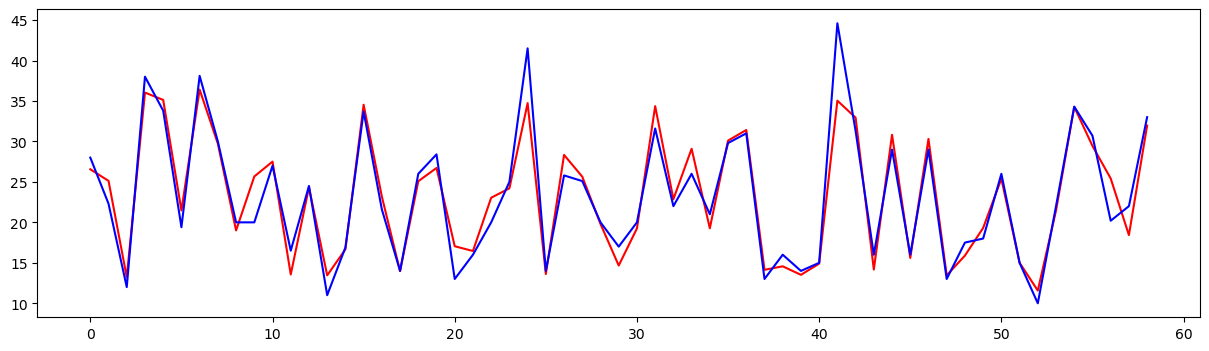

In [88]:
# courbe de comparaison des prédictions et valeurs réelles
plt.figure(figsize=(15,4))
plt.plot(y_pred, '-r', Y_test, '-b')
plt.show()

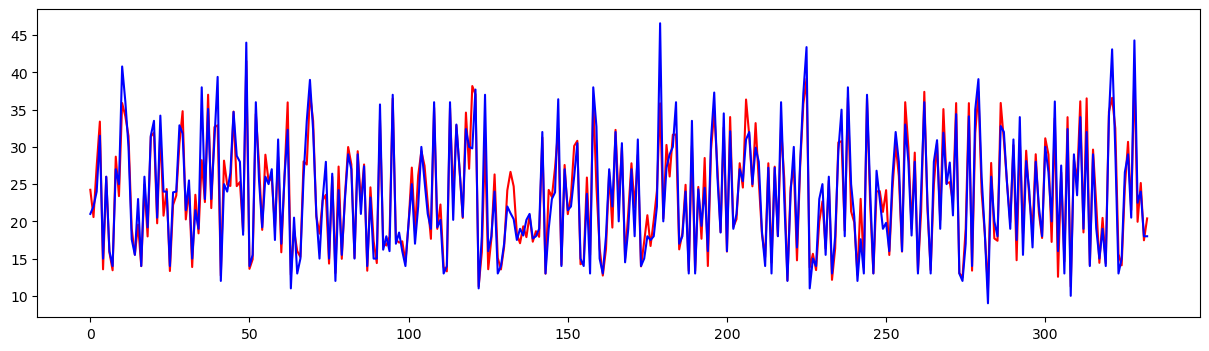

score :  0.9124159280810129


In [89]:
# courbe de comparaison à l'entrainement et valeurs réelles
plt.figure(figsize=(15,4))
plt.plot(y_pred2, '-r', Y_train, '-b')
plt.show()
print('score : ', gpr.score(X_train,Y_train))

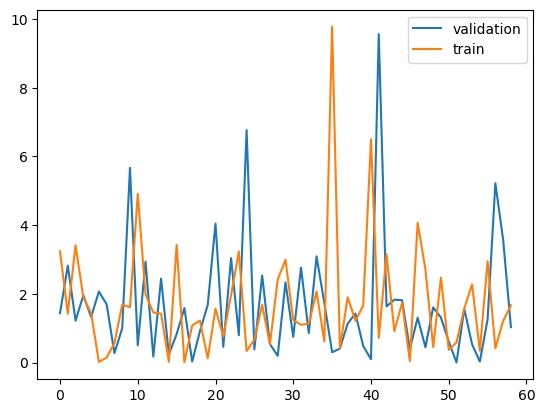

In [91]:
# courbe de comparaison entre les scores à l'entrainement et au test

list1 = []
list2 = []
for k in range(0,59):
    list1.append(abs(y_pred[k] - Y_test[k]))
    list2.append(abs(y_pred2[k]- Y_train[k]))
    
plt.plot(list1, label='validation')
plt.plot(list2, label='train')

plt.legend()

In [100]:
kernel = 1.1 * RBF(length_scale=1e-1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1e-2, noise_level_bounds=(1e-10, 1e1))

model = GaussianProcessRegressor(kernel=kernel, alpha=0.0)
for k in range(5,16): 
    Accuracy_Values=cross_val_score(model, data , target, cv=k)
    print('\n Précision moyenne finale du modèle pour cv = ', k,' : ',round(Accuracy_Values.mean(),2))


 Précision moyenne finale du modèle pour cv =  5  :  0.72

 Précision moyenne finale du modèle pour cv =  6  :  0.67

 Précision moyenne finale du modèle pour cv =  7  :  0.7

 Précision moyenne finale du modèle pour cv =  8  :  0.73

 Précision moyenne finale du modèle pour cv =  9  :  0.76

 Précision moyenne finale du modèle pour cv =  10  :  0.76

 Précision moyenne finale du modèle pour cv =  11  :  0.74

 Précision moyenne finale du modèle pour cv =  12  :  0.72

 Précision moyenne finale du modèle pour cv =  13  :  0.76

 Précision moyenne finale du modèle pour cv =  14  :  0.73

 Précision moyenne finale du modèle pour cv =  15  :  0.76


# Déploiement du Modèle

    Step 1. Réentraîner le modèle en utilisant des données à 100% 
    Step 2. Enregistrez le modèle en tant que fichier sérialisé pouvant être stocké n'importe où
    Step 3. Créer une fonction python

In [8]:
import numpy as np
import matplotlib.pylab as plt
# Import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
# importation des librairies nécessaires
import pandas as pd
import seaborn as sns
# import des packages et librairies de rbf

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,WhiteKernel
# # Supprimer les messages d'avertissemen
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Lecture du dataset
# DataFrame
dataSet = pd.read_csv("autosmpgdata.csv")
varfinal= ['MPG','DISPLACEMENT','HP','WEIGHT','CYLINDERS','YEAR','ORIGIN']
# suppression des Nan puis conversion en numérique
dataSet['HP'] = dataSet['HP'].apply(pd.to_numeric, errors='coerce') 
dataSet= dataSet.dropna(axis=0, how='any')
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   CYLINDERS     392 non-null    int64  
 2   DISPLACEMENT  392 non-null    float64
 3   HP            392 non-null    float64
 4   WEIGHT        392 non-null    int64  
 5   ACCELERATION  392 non-null    float64
 6   YEAR          392 non-null    int64  
 7   ORIGIN        392 non-null    int64  
 8   NAME          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [44]:

dt = dataSet[varfinal]

target = dt[['MPG']].values
data= dt[['DISPLACEMENT','HP','WEIGHT','CYLINDERS','YEAR','ORIGIN']].values
# Normalisation
# Sur ces données, le MinMaxScaler donne de meilleurs résultats
scale= MinMaxScaler()
data = scale.fit_transform(data)
print(target.shape, data.shape)
# Enregistrement de ces données finales pour référence lors du déploiement
data2 = dataSet[['DISPLACEMENT','HP','WEIGHT','CYLINDERS','YEAR','ORIGIN']]
data2.to_pickle('DataForML.pkl')

(392, 1) (392, 6)


In [45]:
# Step 1
kernel = 1.1 * RBF(length_scale=1e-1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1e-2, noise_level_bounds=(1e-10, 1e1))

model = GaussianProcessRegressor(kernel=kernel, alpha=0.0)

# Entraînement du modèle sur 100% de données disponibles 
modelRBF = model.fit(data,target)

In [46]:
# Step2 :
import pickle
import os
# L'enregistrement des objets Python en tant que fichiers sérialisés peut être effectué à l'aide de la bibliothèque pickle 

with open('modelRBF.pkl', 'wb') as fileWriteStream:
    pickle.dump(modelRBF, fileWriteStream)
    # N'oubliez pas de fermer le filestream ! 
    fileWriteStream.close()
    
print('le fichier pickle du modèle prédictif est enregistré à l emplacement :',os.getcwd())

le fichier pickle du modèle prédictif est enregistré à l emplacement : C:\Users\LENOVO\Desktop\Python


In [47]:
# Step 3 :
# This Function can be called from any from any front end tool/website
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
def FunctionPredictResult(InputData):
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    scale= MinMaxScaler()
    data = scale.fit_transform(DataForML)
     
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['DISPLACEMENT','HP','WEIGHT','CYLINDERS','YEAR','ORIGIN']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=scale.transform(X)
    print(X)
    # Loading the Function from pickle file
    import pickle
    with open('modelRBF.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [49]:
# Calling the function for some loan applications
NewData=pd.DataFrame(
data=[[307.0,130.0,3504,8,70,1],
      [350.0,165.0,3693,8,70,1]],
columns=['DISPLACEMENT','HP','WEIGHT','CYLINDERS','YEAR','ORIGIN'])

print(NewData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewData)

   DISPLACEMENT     HP  WEIGHT  CYLINDERS  YEAR  ORIGIN
0         307.0  130.0    3504          8    70       1
1         350.0  165.0    3693          8    70       1
[[0.61757106 0.45652174 0.5361497  1.         0.         0.        ]
 [0.72868217 0.64673913 0.58973632 1.         0.         0.        ]]


,Prediction
0,16.303736
1,14.908675
